In [162]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install urlextract
!pip install wordcloud
# !pip install collections
!pip install emoji==1.7.0
!pip install deep_translator
!pip install vaderSentiment
import emoji
!pip install nltk
import nltk

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# FOR HINGLISH DATA SENTIMENT ANALYSIS

# import codecs
 
# # This is to translate the text from Hindi to English
# from deep_translator import GoogleTranslator
 
# # This is to analyse the sentiment of text
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [195]:
f = open("WhatsApp Chat with Peace hai ☮️.txt",'r',encoding = 'utf-8')

In [196]:
data = f.read()

In [197]:
data

'12/17/22, 19:15 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n12/17/22, 19:15 - You created group "Peace finders"\n12/17/22, 19:16 - You changed the subject from "Peace finders" to "Peace hai 🕊️"\n12/17/22, 19:38 - Sharansh vardhan RK GG +0: <Media omitted>\n12/17/22, 19:42 - Sharansh vardhan RK GG +0: <Media omitted>\n12/17/22, 19:46 - Sharansh vardhan RK GG +0: <Media omitted>\n12/17/22, 19:50 - Yash Vardhan Yadav _GG: <Media omitted>\n12/17/22, 19:55 - Sharansh vardhan RK GG +0: <Media omitted>\n12/17/22, 19:56 - Sharansh vardhan RK GG +0: <Media omitted>\n12/17/22, 20:06 - Sharansh vardhan RK GG +0: <Media omitted>\n12/17/22, 20:07 - Sharansh vardhan RK GG +0: <Media omitted>\n12/17/22, 20:20 - Sharansh vardhan RK GG +0: <Media omitted>\n12/17/22, 20:22 - Sharansh vardhan RK GG +0: <Media omitted>\n12/17/22, 20:32 - Sharansh vardhan RK GG +0: <Media omitted>\n12/17/22, 20:32 - Sharansh

In [198]:
def preprocess(data):
#     pattern = '\d{1,2}/\d{1,2}/\d{2,3},\s\d{1,2}:\d{2}\s-\s'
    pattern = '\d{2}\/\d{2}\/\d{2}, \d{2}:\d{2} - '

    messages = re.split(pattern, data)[1:]
    messages = [item for item in messages if not re.match(r'\d{2}/\d{2}/\d{2}', item)]
    messages = [item for item in messages if not re.match(r'\d{2}:\d{2}', item)]

#     print(messages)
    dates = re.findall(pattern, data)
#     print(dates)

    df = pd.DataFrame({'user_message': messages, 'message_date': dates})
    df.head()
    # convert message_date type
    df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')

    df.rename(columns={'message_date': 'date'}, inplace=True)

    users = []
    messages = []
    for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]))
        else:
            users.append('group_notification')
            messages.append(entry[0])

    df['user'] = users
    df['message'] = messages
    df.drop(columns=['user_message'], inplace=True)

    df['only_date'] = df['date'].dt.date
    df['year'] = df['date'].dt.year
    df['month_num'] = df['date'].dt.month
    df['month'] = df['date'].dt.month_name()
    df['day'] = df['date'].dt.day
    df['day_name'] = df['date'].dt.day_name()
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute

    period = []
    for hour in df[['day_name', 'hour']]['hour']:
        if hour == 23:
            period.append(str(hour) + "-" + str('00'))
        elif hour == 0:
            period.append(str('00') + "-" + str(hour + 1))
        else:
            period.append(str(hour) + "-" + str(hour + 1))

    df['period'] = period
#     df['translated'] = df["message"].apply(lambda x:GoogleTranslator(source='auto', target='en').translate(x))
    sentiments=SentimentIntensityAnalyzer()
    df["positive"]=[sentiments.polarity_scores(i)["pos"] for i in df["message"]]
    df["negative"]=[sentiments.polarity_scores(i)["neg"] for i in df["message"]]
    df["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in df["message"]]
    print(df.shape)

    return df

In [199]:
df = preprocess(data)

(4597, 15)


In [201]:
df.head(40)

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period,positive,negative,neutral
0,2022-12-17 19:15:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022-12-17,2022,12,December,17,Saturday,19,15,19-20,0.000,0.084,0.916
1,2022-12-17 19:15:00,group_notification,"You created group ""Peace finders""\n",2022-12-17,2022,12,December,17,Saturday,19,15,19-20,0.647,0.000,0.353
2,2022-12-17 19:16:00,group_notification,"You changed the subject from ""Peace finders"" t...",2022-12-17,2022,12,December,17,Saturday,19,16,19-20,0.438,0.000,0.562
3,2022-12-17 19:38:00,Sharansh vardhan RK GG +0,<Media omitted>\n,2022-12-17,2022,12,December,17,Saturday,19,38,19-20,0.000,0.000,1.000
4,2022-12-17 19:42:00,Sharansh vardhan RK GG +0,<Media omitted>\n,2022-12-17,2022,12,December,17,Saturday,19,42,19-20,0.000,0.000,1.000
5,2022-12-17 19:46:00,Sharansh vardhan RK GG +0,<Media omitted>\n,2022-12-17,2022,12,December,17,Saturday,19,46,19-20,0.000,0.000,1.000
6,2022-12-17 19:50:00,Yash Vardhan Yadav _GG,<Media omitted>\n,2022-12-17,2022,12,December,17,Saturday,19,50,19-20,0.000,0.000,1.000
7,2022-12-17 19:55:00,Sharansh vardhan RK GG +0,<Media omitted>\n,2022-12-17,2022,12,December,17,Saturday,19,55,19-20,0.000,0.000,1.000
8,2022-12-17 19:56:00,Sharansh vardhan RK GG +0,<Media omitted>\n,2022-12-17,2022,12,December,17,Saturday,19,56,19-20,0.000,0.000,1.000
9,2022-12-17 20:06:00,Sharansh vardhan RK GG +0,<Media omitted>\n,2022-12-17,2022,12,December,17,Saturday,20,6,20-21,0.000,0.000,1.000


In [202]:
user_list = df['user'].unique().tolist()
user_list.remove('group_notification')
user_list.sort()
user_list.insert(0,"Overall")

In [203]:
user_list

['Overall',
 'Arjun GG',
 'Deovardhan _GG',
 'Dilshad GG MMM',
 'Kanishka Garg _GG',
 'Nikita Joshi _EX',
 'Nishim Goyal  RK GG +0',
 'Sharansh vardhan RK GG +0',
 'Shaurya_😎',
 'Shubham Kumar RK GG +0',
 'Sushrut Kagde GG',
 'Vasu Verma GG',
 'Yash Vardhan Yadav _GG']

In [93]:
selected_user = input()

Shaurya_😎


In [204]:
selected_user

'Shaurya_😎'

In [300]:
from urlextract import URLExtract
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import emoji

extract = URLExtract()

def fetch_stats(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    # fetch the number of messages
    num_messages = df.shape[0]

    # fetch the total number of words
    words = []
    for message in df['message']:
        words.extend(message.split())

    # fetch number of media messages
    num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]

    # fetch number of links shared
    links = []
    for message in df['message']:
        links.extend(extract.find_urls(message))

    return num_messages,len(words),num_media_messages,len(links)

def most_busy_users(df):
    x = df['user'].value_counts().head(10)
    df = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})
    return x,df

def create_wordcloud(selected_user,df):

    f = open('stop_hinglish.txt', 'r')
    stop_words = f.read()

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    temp = df[df['user'] != 'group_notification']
    temp = temp[temp['message'] != '<Media omitted>\n']

    def remove_stop_words(message):
        y = []
        for word in message.lower().split():
            if word not in stop_words:
                y.append(word)
        return " ".join(y)

    wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
    temp['message'] = temp['message'].apply(remove_stop_words)
    df_wc = wc.generate(temp['message'].str.cat(sep=" "))
    return df_wc

def most_common_words(selected_user,df):

    f = open('stop_hinglish.txt','r')
    stop_words = f.read()

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    temp = df[df['user'] != 'group_notification']
    temp = temp[temp['message'] != '<Media omitted>\n']

    words = []

    for message in temp['message']:
        for word in message.lower().split():
            if word not in stop_words:
                words.append(word)

    most_common_df = pd.DataFrame(Counter(words).most_common(20))
    return most_common_df

def emoji_helper(selected_user,df):
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    emojis = []
    for message in df['message']:
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

    emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

    return emoji_df

def monthly_timeline(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()
    print(timeline)
    time = []
    for i in range(timeline.shape[0]):
        time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

    timeline['time'] = time
    print(timeline)
    return timeline

def daily_timeline(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    daily_timeline = df.groupby('only_date').count()['message'].reset_index()

    return daily_timeline

def week_activity_map(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    return df['day_name'].value_counts()

def month_activity_map(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    return df['month'].value_counts()

def activity_heatmap(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    user_heatmap = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)
    return user_heatmap

def person_sentiment(selected_user,df):
    
    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]
      
    a=sum(df["positive"])
    b=sum(df["negative"])
    c=sum(df["neutral"])


    if (a>b) and (a>c):
        print(f"Positive {a}")
    if (b>a) and (b>c):
        print(f"Negative {b}")
    if (c>a) and (c>b):
        print(f"Neutal {c}")

def most_negative(df,user_list):
    n = []
    user_list.remove('Overall')
    for i in user_list:
        df = df[df['user'] == i]
        neg = sum(df["negative"])
        n.append(neg)
    j = int(n.index(max(n)))
    print(f"{user_list[j]} with negativity of {n[j]}") 
    


In [96]:
num_messages, words, num_media_messages, num_links = fetch_stats(selected_user,df)
print(f"Number of messages - {num_messages}")
print(f"Number of Words - {words}")
print(f"Number of Media - {num_media_messages}")
print(f"Number of Links - {num_links}")

Number of messages - 426
Number of Words - 1659
Number of Media - 71
Number of Links - 0


   year  month_num     month  message
0  2022         12  December      426
   year  month_num     month  message           time
0  2022         12  December      426  December-2022


([0], [Text(0, 0, 'December-2022')])

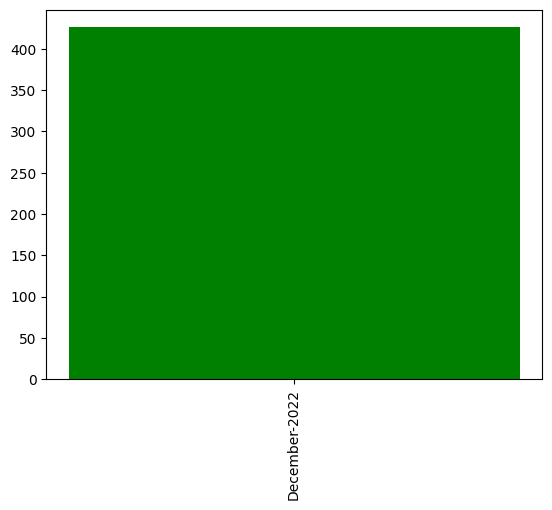

In [103]:
timeline = monthly_timeline(selected_user,df)
fig,ax = plt.subplots()
ax.bar(timeline['time'], timeline['message'],color='green')
plt.xticks(rotation='vertical')

(array([19343., 19345., 19347., 19349., 19351., 19353., 19355., 19357.]),
 [Text(19343.0, 0, '2022-12-17'),
  Text(19345.0, 0, '2022-12-19'),
  Text(19347.0, 0, '2022-12-21'),
  Text(19349.0, 0, '2022-12-23'),
  Text(19351.0, 0, '2022-12-25'),
  Text(19353.0, 0, '2022-12-27'),
  Text(19355.0, 0, '2022-12-29'),
  Text(19357.0, 0, '2022-12-31')])

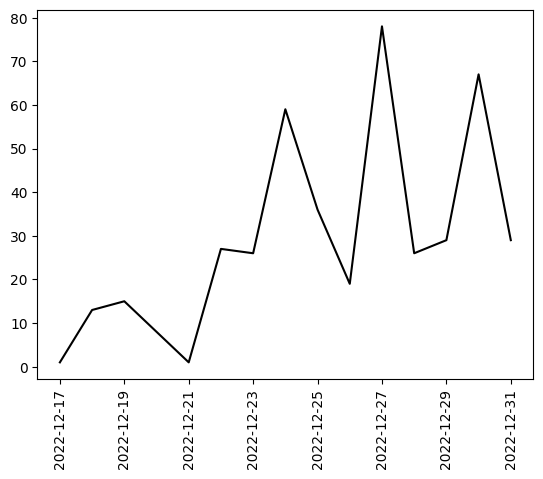

In [104]:
daily_timeline = daily_timeline(selected_user, df)
fig, ax = plt.subplots()
ax.plot(daily_timeline['only_date'], daily_timeline['message'], color='black')
plt.xticks(rotation='vertical')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Sunday'),
  Text(5, 0, 'Monday'),
  Text(6, 0, 'Wednesday')])

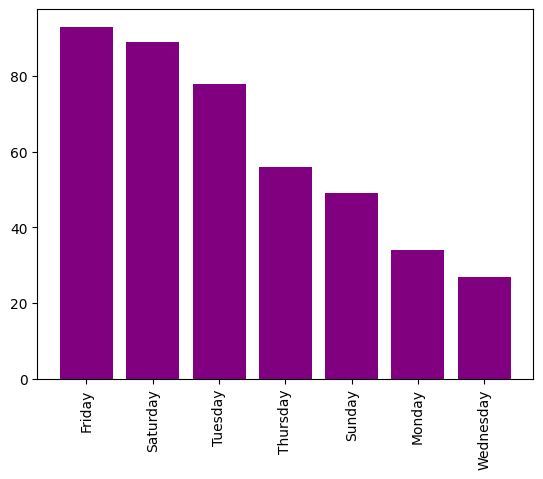

In [105]:
busy_day = week_activity_map(selected_user,df)
fig,ax = plt.subplots()
ax.bar(busy_day.index,busy_day.values,color='purple')
plt.xticks(rotation='vertical')

([0], [Text(0, 0, 'December')])

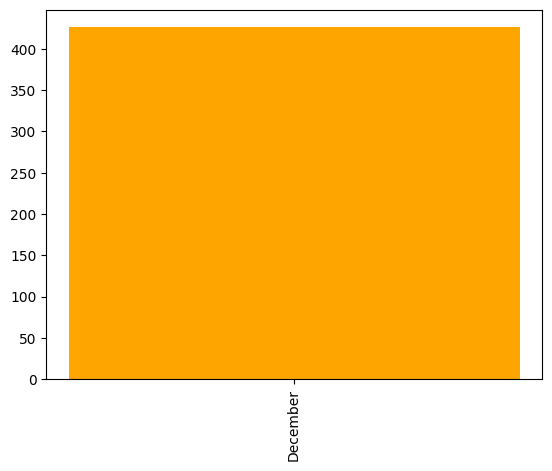

In [107]:
busy_month = month_activity_map(selected_user, df)
fig, ax = plt.subplots()
ax.bar(busy_month.index, busy_month.values,color='orange')
plt.xticks(rotation='vertical')

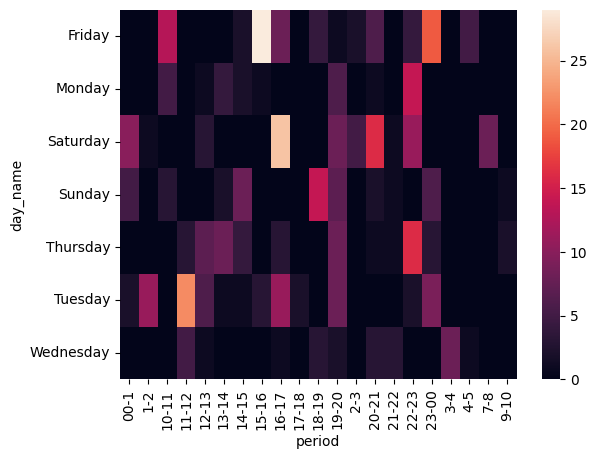

In [111]:
user_heatmap = activity_heatmap(selected_user,df)
fig,ax = plt.subplots()
ax = sns.heatmap(user_heatmap)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Kanishka Garg _GG'),
  Text(1, 0, 'Dilshad GG MMM'),
  Text(2, 0, 'Arjun GG'),
  Text(3, 0, 'Sushrut Kagde GG'),
  Text(4, 0, 'Shaurya_😎'),
  Text(5, 0, 'Nikita Joshi _EX'),
  Text(6, 0, 'Sharansh vardhan RK GG +0'),
  Text(7, 0, 'Vasu Verma GG'),
  Text(8, 0, 'Deovardhan _GG'),
  Text(9, 0, 'Shubham Kumar RK GG +0')])

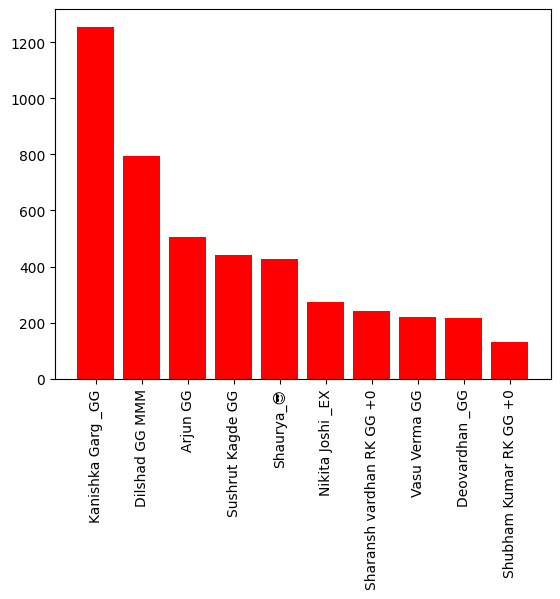

In [115]:
x,new_df = most_busy_users(df)
fig, ax = plt.subplots()
ax.bar(x.index, x.values,color='red')
plt.xticks(rotation='vertical')


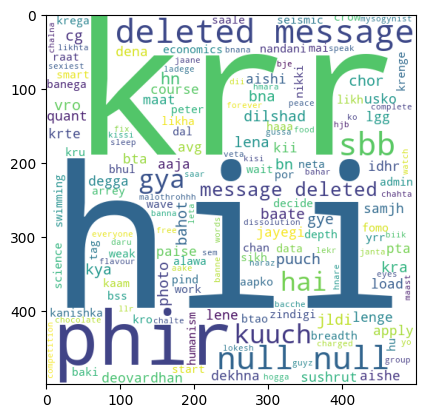

In [116]:
df_wc = create_wordcloud(selected_user,df)
fig,ax = plt.subplots()
ax.imshow(df_wc)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

D:\Anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129761 (\U0001fae1) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128583 (\N{PERSON BOWING DEEPLY}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\lib\site-packages\IPython\core\even

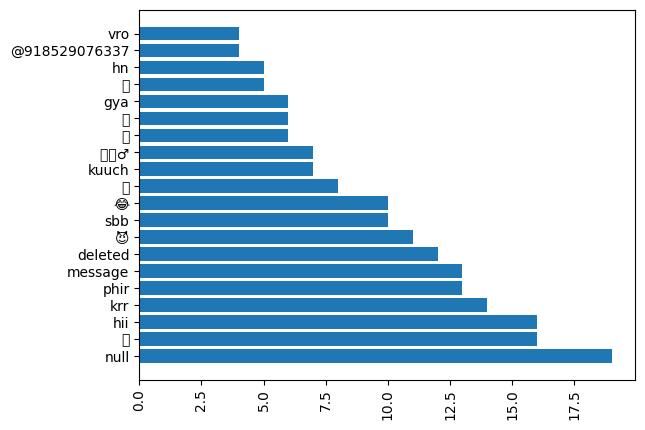

In [118]:
most_common_df = most_common_words(selected_user,df)

fig,ax = plt.subplots()

ax.barh(most_common_df[0],most_common_df[1])
plt.xticks(rotation='vertical')

([<matplotlib.patches.Wedge at 0x27bba38eb90>,
 [Text(0.7096892156196285, 0.8404410849269548, '🥲'),
  Text(-0.8404410517040038, 0.7096892549635145, '👀'),
  Text(-0.8404411845957961, -0.7096890975879616, '\U0001fae1'),
  Text(0.42095168045176734, -1.016267525174761, '😂'),
  Text(1.0480526059536501, -0.33404451073736124, '😈')],
 [Text(0.3871032085197973, 0.4584224099601571, '27.68'),
  Text(-0.4584223918385475, 0.3871032299800988, '22.32'),
  Text(-0.4584224643249796, -0.3871031441388881, '22.32'),
  Text(0.2296100075191458, -0.5543277410044151, '17.86'),
  Text(0.5716650577929, -0.1822060967658334, '9.82')])

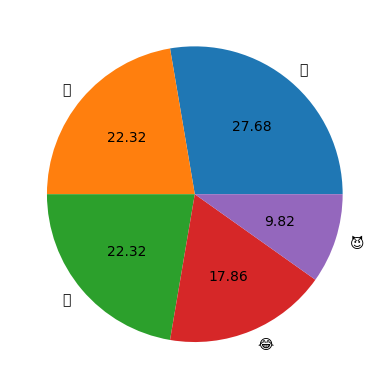

In [132]:
emoji_df =emoji_helper(selected_user,df)
import emoji
fig,ax = plt.subplots()
ax.pie(emoji_df[1].head(),labels=emoji_df[0].head(),autopct="%0.2f")


In [167]:
person_sentiment(selected_user,df)

Neutal 388.57200000000006


In [301]:
most_negative(df,user_list)

Arjun GG with negativity of 8.284


PREDICTING THE SENDER OF A MESSAGE USING NeuRAL NETWORKS

In [206]:
d = df[df.user != 'group_notification']

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [303]:
from sklearn.preprocessing import OneHotEncoder
  
# Retrieving data

  
# Converting type of columns to category
d['user'] = d['user'].astype('category')

  
  
# Assigning numerical values and storing it in another columns
d['user_new'] = d['user'].cat.codes

  
  
# # Create an instance of One-hot-encoder
# enc = OneHotEncoder()
  
# # Passing encoded columns
  
# enc_data = pd.DataFrame(enc.fit_transform(
#     df[['user_new']]).toarray())
  
# # Merge with main
# New_df = df.join(enc_data)
  

C:\Users\shaur\AppData\Local\Temp\ipykernel_30628\2455980405.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['user'] = d['user'].astype('category')
C:\Users\shaur\AppData\Local\Temp\ipykernel_30628\2455980405.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['user_new'] = d['user'].cat.codes


In [304]:
d['user_new'].value_counts()

3     1255
2      793
0      504
9      441
7      426
4      274
6      242
10     220
1      217
8      131
5       51
11      22
Name: user_new, dtype: int64

In [305]:

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [306]:
train, val, test = np.split(d.sample(frac=1), [int(0.8*len(d)), int(0.9*len(d))])

In [307]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
    
    
    df = dataframe.copy()
    labels = df.pop('user_new')
    df = df["message"]
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

In [308]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [236]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int8, name=None))>

In [309]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [310]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.38756353, -0.18680103, -0.20580176, ...,  0.38007948,
        -0.13154963,  0.08812382],
       [ 0.41385454, -0.41573897, -0.22099683, ...,  0.16469966,
         0.01820005,  0.29062355],
       [ 0.11937255, -0.21395022,  0.07329424, ...,  0.43143857,
         0.08085099,  0.06199227],
       ...,
       [ 0.14538397,  0.01254703,  0.01279864, ...,  0.20881596,
        -0.10476724,  0.11914831],
       [ 0.27534485, -0.2963848 ,  0.09005205, ...,  0.05820467,
         0.13844432,  0.2037521 ],
       [ 0.24792399, -0.45655096, -0.43812522, ...,  0.21612194,
        -0.09797737,  0.29616448]], dtype=float32)>

In [317]:
model = tf.keras.Sequential()
model.add(hub_layer)

model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(len(user_list), activation='sigmoid'))

In [278]:
# model.build((len(user_list)-2,len(user_list)-2,3))

In [275]:
len(user_list)

13

In [320]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_30 (Dense)            (None, 16)                816       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 flatten_8 (Flatten)         (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 12)              

In [318]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [319]:
model.evaluate(train_data)

4/4 [==============================] - 1s 5ms/step - loss: 2.4801 - accuracy: 0.1197


[2.4800994396209717, 0.11967213451862335]

In [323]:
model.evaluate(valid_data)

1/1 [==============================] - 0s 462ms/step - loss: 2.4775 - accuracy: 0.1245


[2.477532386779785, 0.12445414811372757]

In [324]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
4/4 [==============================] - 11s 1s/step - loss: 2.4840 - accuracy: 0.1221 - val_loss: 2.4588 - val_accuracy: 0.1616
Epoch 2/10
4/4 [==============================] - 4s 905ms/step - loss: 2.4649 - accuracy: 0.1495 - val_loss: 2.4410 - val_accuracy: 0.1878
Epoch 3/10
4/4 [==============================] - 4s 1s/step - loss: 2.4425 - accuracy: 0.1732 - val_loss: 2.4235 - val_accuracy: 0.2183
Epoch 4/10
4/4 [==============================] - 4s 1s/step - loss: 2.4269 - accuracy: 0.1765 - val_loss: 2.4055 - val_accuracy: 0.2336
Epoch 5/10
4/4 [==============================] - 3s 872ms/step - loss: 2.4009 - accuracy: 0.2044 - val_loss: 2.3867 - val_accuracy: 0.2991
Epoch 6/10
4/4 [==============================] - 4s 912ms/step - loss: 2.3809 - accuracy: 0.2224 - val_loss: 2.3670 - val_accuracy: 0.2969
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 2.3635 - accuracy: 0.2331 - val_loss: 2.3462 - val_accuracy: 0.3035
Epoch 8/10
4/4 [===============

In [325]:
model.evaluate(test_data)

1/1 [==============================] - 1s 752ms/step - loss: 2.2701 - accuracy: 0.2969


[2.2701432704925537, 0.29694321751594543]

In [330]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [331]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'omitted', 'media', 'hai', 'h', 'kya', 'nhi', 'the',
       'bhi', 'bhai', 'this', 'me', 'ka', 'was', 'rha', 'se', 'message',
       'hi', 'deleted'], dtype='<U22')

In [336]:
model2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(user_list), activation='softmax')
])

In [337]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [338]:
model.evaluate(train_data)
model.evaluate(valid_data)

1/1 [==============================] - 0s 107ms/step - loss: 2.2826 - accuracy: 0.3035


[2.282588481903076, 0.3034934401512146]

In [339]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
4/4 [==============================] - 4s 831ms/step - loss: 2.2799 - accuracy: 0.2582 - val_loss: 2.2630 - val_accuracy: 0.3057
Epoch 2/10
4/4 [==============================] - 3s 845ms/step - loss: 2.2641 - accuracy: 0.2623 - val_loss: 2.2433 - val_accuracy: 0.3057
Epoch 3/10
4/4 [==============================] - 3s 832ms/step - loss: 2.2438 - accuracy: 0.2721 - val_loss: 2.2244 - val_accuracy: 0.3079
Epoch 4/10
4/4 [==============================] - 3s 867ms/step - loss: 2.2257 - accuracy: 0.2721 - val_loss: 2.2069 - val_accuracy: 0.3079
Epoch 5/10
4/4 [==============================] - 3s 841ms/step - loss: 2.2005 - accuracy: 0.2852 - val_loss: 2.1904 - val_accuracy: 0.3079
Epoch 6/10
4/4 [==============================] - 3s 849ms/step - loss: 2.2082 - accuracy: 0.2650 - val_loss: 2.1749 - val_accuracy: 0.3057
Epoch 7/10
4/4 [==============================] - 3s 825ms/step - loss: 2.1894 - accuracy: 0.2787 - val_loss: 2.1608 - val_accuracy: 0.3057
Epoch 8/10
4/4 [====

In [342]:
model.evaluate(test_data)

1/1 [==============================] - 0s 112ms/step - loss: 2.1086 - accuracy: 0.3341


[2.10856294631958, 0.3340611457824707]

In [ ]:
print(model.predict(fitted_vectorizer.transform([complaint])))


In [322]:
#USING ONE VS REST NAIVE BAIS CLASSIFIER

In [ ]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))